# Hồi Quy Tuyến Tính Đơn Giản

Thời lượng ước tính: **45** phút

## Mục tiêu

Sau khi hoàn thành bài lab này bạn sẽ có thể:

-   Sử dụng scikit-learn để triển khai Hồi Quy Tuyến Tính Đơn Giản
-   Tạo một mô hình, huấn luyện, kiểm tra và sử dụng mô hình


### Import các gói cần thiết


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

## Hiểu dữ liệu

### `FuelConsumption.csv`:

Chúng tôi đã download tập dữ liệu tiêu thụ nhiên liệu **`FuelConsumption.csv`**, chứa xếp hạng mức tiêu thụ nhiên liệu cụ thể cho từng mẫu xe và lượng khí thải CO2 ước tính cho các loại xe hạng nhẹ bán lẻ mới ở Canada. [Nguồn tập dữ liệu](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)

-   **MODELYEAR** ví dụ: 2014
-   **MAKE** ví dụ: Acura
-   **MODEL** ví dụ: ILX
-   **VEHICLE CLASS** ví dụ: SUV
-   **ENGINE SIZE** ví dụ: 4.7
-   **CYLINDERS** ví dụ: 6
-   **TRANSMISSION** ví dụ: A6
-   **FUEL CONSUMPTION in CITY(L/100 km)** ví dụ: 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** ví dụ: 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** ví dụ: 9.2
-   **CO2 EMISSIONS (g/km)** ví dụ: 182   --> low --> 0


## Đọc dữ liệu vào


In [2]:
df = pd.read_csv("FuelConsumption.csv")

# xem tập dữ liệu
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Khám phá Dữ liệu

Trước tiên, hãy khám phá mô tả về dữ liệu.


In [3]:
# tóm tắt dữ liệu
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Hãy chọn một số đặc trưng để khám phá thêm.


In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


Chúng ta có thể vẽ biểu đồ từng đặc trưng sau:


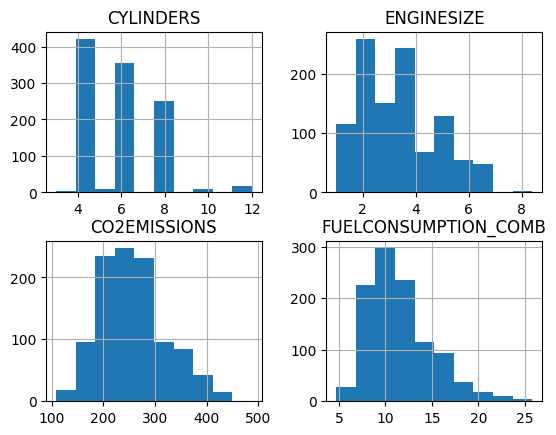

In [5]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Bây giờ, hãy vẽ biểu đồ của từng đặc trưng này với Emission để xem mối quan hệ của chúng tuyến tính như thế nào:


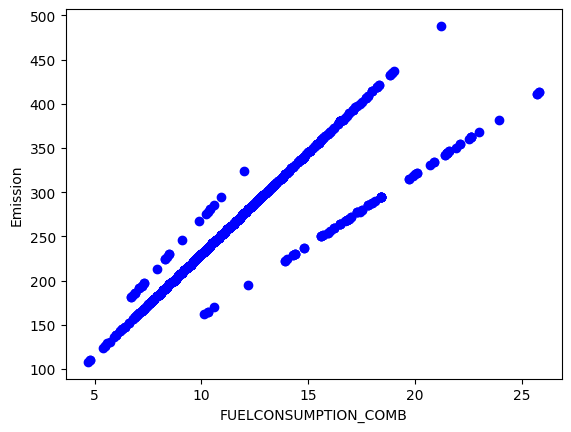

In [6]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

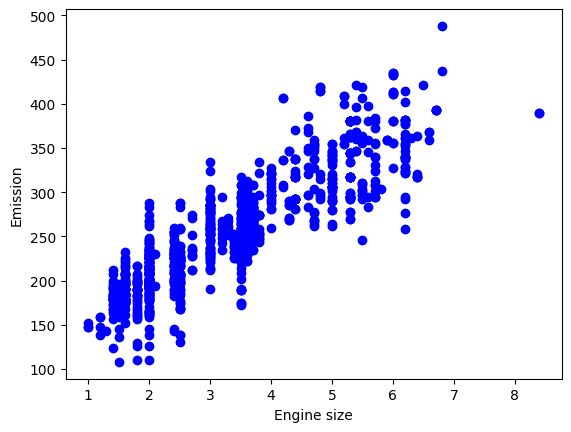

In [7]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Luyện tập

Vẽ biểu đồ **CYLINDER** với Emission, để xem mối quan hệ của chúng tuyến tính như thế nào:


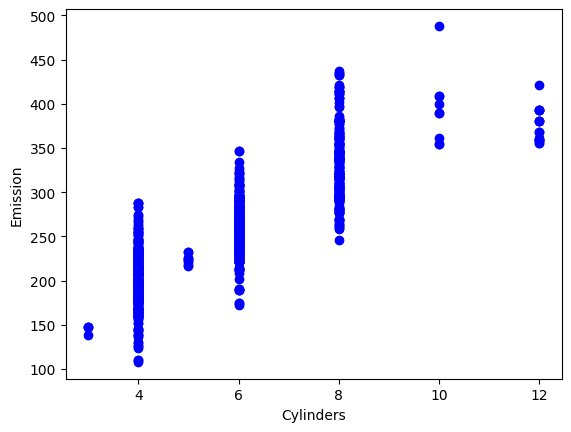

In [9]:
# viết code của bạn ở đây

plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()


<details><summary>Click vào đây để xem lời giải</summary>

```python
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

```

</details>


#### Tạo tập dữ liệu train và test

Train/Test Split liên quan đến việc chia nhỏ tập dữ liệu thành training set và test set tương ứng loại trừ lẫn nhau (tập dữ liệu ban đầu được tách thành 2 tập dữ liệu riêng biệt, dữ liệu của tập này không chứa trong tập còn lại). Sau đó, bạn huấn luyện mô hình với training set và kiểm tra với test set.
Điều này sẽ cung cấp đánh giá chính xác hơn về độ chính xác ngoài mẫu vì tập dữ liệu testing không phải là một phần của tập dữ liệu được sử dụng để huấn luyện dữ liệu. Nó sát với các vấn đề trong thực tế hơn.

Điều này có nghĩa là chúng ta biết kết quả của từng điểm dữ liệu trong tập dữ liệu này, giúp cho việc kiểm tra trở nên tuyệt vời! Và vì dữ liệu này không được sử dụng để huấn luyện mô hình, nên mô hình không có kiến thức về kết quả của các điểm dữ liệu này. Vì vậy, về bản chất, nó thực sự là một testing ngoài mẫu.

Hãy chia tập dữ liệu của chúng ta thành train set và test set, 80% toàn bộ dữ liệu cho training và 20% cho testing. Chúng ta tạo một mask để chọn các hàng ngẫu nhiên bằng hàm **np.random.rand()**:


In [10]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]  
test = cdf[~msk]

### Mô hình Hồi quy đơn giản

Hồi quy tuyến tính phù hợp với một mô hình tuyến tính với các hệ số B = (B1, ..., Bn) để giảm 'tổng bình phương phần dư' giữa giá trị thực tế y trong tập dữ liệu và giá trị dự đoán y bằng phép xấp xỉ tuyến tính.


#### Phân phối dữ liệu huấn luyện


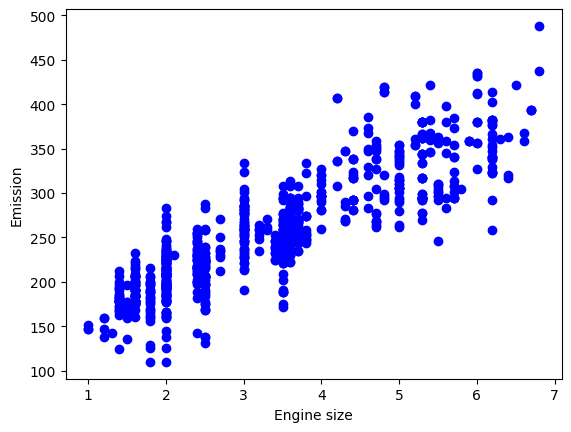

In [11]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Lập mô hình

Sử dụng gói sklearn để lập mô hình dữ liệu.


In [12]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.55201953]]
Intercept:  [123.93182421]


Như đã đề cập trước đây, **Hệ số (Coefficient)** và **Hệ số chặn (Intercept)** trong hồi quy tuyến tính đơn giản là các tham số của đường hồi quy (Fit line).
Biết rằng đây là một hồi quy tuyến tính đơn giản, chỉ có 2 tham số và biết rằng các tham số là điểm chặn và độ dốc của đường, sklearn có thể ước tính chúng trực tiếp từ dữ liệu.
Lưu ý rằng tất cả dữ liệu phải có sẵn để duyệt và tính toán các tham số.


#### Vẽ biểu đồ output


Ta có thể vẽ biểu đồ đường hồi quy trên dữ liệu:


Text(0, 0.5, 'Emission')

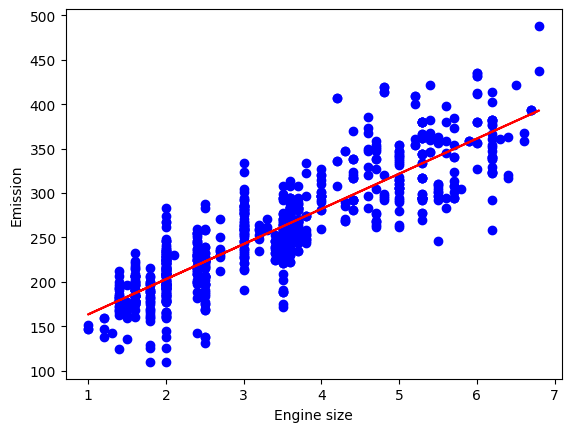

In [13]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Đánh giá

Chúng ta so sánh giá trị thực tế và giá trị đã dự đoán để tính độ chính xác của mô hình hồi quy. Các thước đo đánh giá đóng vai trò quan trọng trong việc phát triển một mô hình, vì nó cung cấp cái nhìn sâu sắc về các phương diện cần cải thiện.

Có các số liệu đánh giá mô hình khác nhau, hãy sử dụng MSE ở đây để tính toán độ chính xác của mô hình dựa trên tets set:

```
- Mean absolute error (Sai số tuyệt đối trung bình): Là giá trị trung bình của giá trị tuyệt đối của các sai số. Đây là chỉ số dễ hiểu nhất vì nó chỉ là sai số trung bình.
- Sai số toàn phương trung bình (MSE): là giá trị trung bình của sai số bình phương. Nó phổ biến hơn sai số tuyệt đối trung bình vì tiêu điểm hướng nhiều hơn đến các sai số lớn. Điều này là do thuật ngữ bình phương làm tăng sai số lớn hơn theo cấp số nhân so với số nhỏ hơn.
- Sai số bình phương trung bình (RMSE).
- R bình phương không phải là sai số, nhưng là một số liệu phổ biến cho độ chính xác của mô hình. Nó thể hiện độ gần của dữ liệu với đường hồi quy được điều chỉnh. R bình phương càng cao thì mô hình càng phù hợp với dữ liệu. Điểm tốt nhất có thể là 1,0 và nó có thể là âm (vì mô hình có thể tệ hơn một cách tùy ý).
```


In [14]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 23.38
Residual sum of squares (MSE): 932.05
R2-score: 0.76


### Cảm ơn bạn đã hoàn thành lab này!

Nguồn bài Lab: **IBM**